Mchezopesa_Ltd_Football_Analysis

## 1.  Defining the Question

Mchezopesa, an online betting platform, is lookibg for a model to predict match outcomes for international fixtures. The prediction will be based on who's home and who's away, and on whether or not the game is friendly.

## a. Research Question
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

There are two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
## b.Metric of Success.

A model that predicts the outcome of international football fixtures considering the following factors: Rank and whether the team is playing at home or away.

## c. Research Approach
Perform EDA
Perform any necessary feature engineering 
Check of multicollinearity
Start building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test


##2. Loading the Datasets and Libraries

In [97]:
#Importing of all libraries to be used for the project:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression

In [88]:

#Loading the fifa ranking and results datasets 
ranking = pd.read_csv('fifa_ranking.csv')

results = pd.read_csv('results.csv')

## An intial look at the data

In [4]:
# To display the top 5 rows of the fifa ranking dataset
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# To display the bottom 5 rows of the fifa ranking dataset
ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
# To display the top 5 rows of the results dataset
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# To display the bottom 5 rows of the results dataset
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
# Checking the data types for the ranking dataset
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [9]:
# Checking the data types for the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [10]:
# Finding the null values in ranking dataset
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [11]:
# Finding the null values in results dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The results data is a list of all FIFA recognised international football matches between November 1872 and July 2019, while the rank data includes FIFA ranking of member federations between August 1993 and June 2018. To be able to use the data to make a prediction, the data needs to be combined for the periods that contain all the data required ie. rank, home score and away score, this means only working with data from August 1993 to June 2018.

In [12]:
#changing the date to date time and splitting it to year month and day columns
results['date'] = pd.to_datetime(results['date'])
results['Year'] = results['date'].dt.year
results['Month'] = results['date'].dt.month
results['Day'] = results['date'].dt.day

In [13]:
#Dropping irrelevant columns for the analysis
results.drop(['date', 'city',
                'country', 'Day'], axis=1, inplace=True)

City and country indicate the location where the matches were played and are expected to have no effect on the results of the analysis

In [14]:
#changing the date to date time and splitting it to year month and year columns
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking['Year'] = ranking['rank_date'].dt.year
ranking['Month'] = ranking['rank_date'].dt.month
ranking['Day'] = ranking['rank_date'].dt.day

In [15]:
#Dropping irrelevant columns for the analysis
ranking.drop(['country_abrv', 'total_points', 'rank_change', 'cur_year_avg', 
              'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
              'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 
              'three_year_ago_weighted', 'confederation', 'rank_date', 'previous_points', 
              'Day', 'rank_date'], axis=1, inplace=True)

The dropped columns are a list of items that are assumed not to be relevant for the analysis susch as the abbreviation of the country being ranked and the several methods used to indicate how the country has been perfoming over a range of 3 years.

In [16]:
# Merging the two datasets 

merged = results.merge(ranking,left_on=['home_team','Year', 'Month'], right_on=['country_full', 'Year', 'Month'])
merged.head(5)

,home_team,away_team,home_score,away_score,tournament,neutral,Year,Month,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993,8,19,Colombia
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,70,Peru
4,Peru,Colombia,0,1,FIFA World Cup qualification,False,1993,8,70,Peru


In [17]:
merged.isnull().sum()

home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
neutral         0
Year            0
Month           0
rank            0
country_full    0
dtype: int64

In [18]:
merged.drop_duplicates(keep=False, inplace=False)

,home_team,away_team,home_score,away_score,tournament,neutral,Year,Month,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993,8,19,Colombia
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,70,Peru
4,Peru,Colombia,0,1,FIFA World Cup qualification,False,1993,8,70,Peru
...,...,...,...,...,...,...,...,...,...,...
18604,Nigeria,Iceland,2,0,FIFA World Cup,True,2018,6,48,Nigeria
18605,Nigeria,Argentina,1,2,FIFA World Cup,True,2018,6,48,Nigeria
18606,Australia,Peru,0,2,FIFA World Cup,True,2018,6,36,Australia
18607,Senegal,Colombia,0,1,FIFA World Cup,True,2018,6,27,Senegal


In [19]:
merged.shape

(18609, 10)

##3. Exploratory Data Analysis

In [20]:
merged.describe()

,home_score,away_score,Year,Month,rank
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000
mean,1.622817,1.074910,2006.467784,6.889462,77.831157
std,1.660216,1.261695,6.816722,3.285789,51.263254
min,0.000000,0.000000,1993.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,34.000000
50%,1.000000,1.000000,2007.000000,7.000000,73.000000
75%,2.000000,2.000000,2012.000000,10.000000,114.000000
max,31.000000,21.000000,2018.000000,12.000000,209.000000


The mean of the home team score is higher than that of the away team, this might indicate a higher likelihood of the homes team winning or the home teams winning by a bigger margin than when the away teams win.

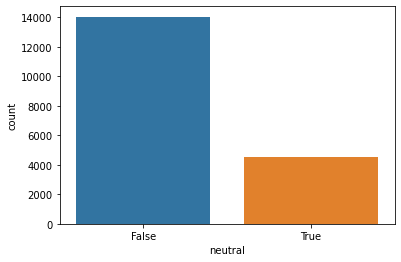

In [21]:
sns.countplot(merged['neutral'])

Most of the matches were played in stadiums in the home teams country with a few played in a stadium in a neutral third country


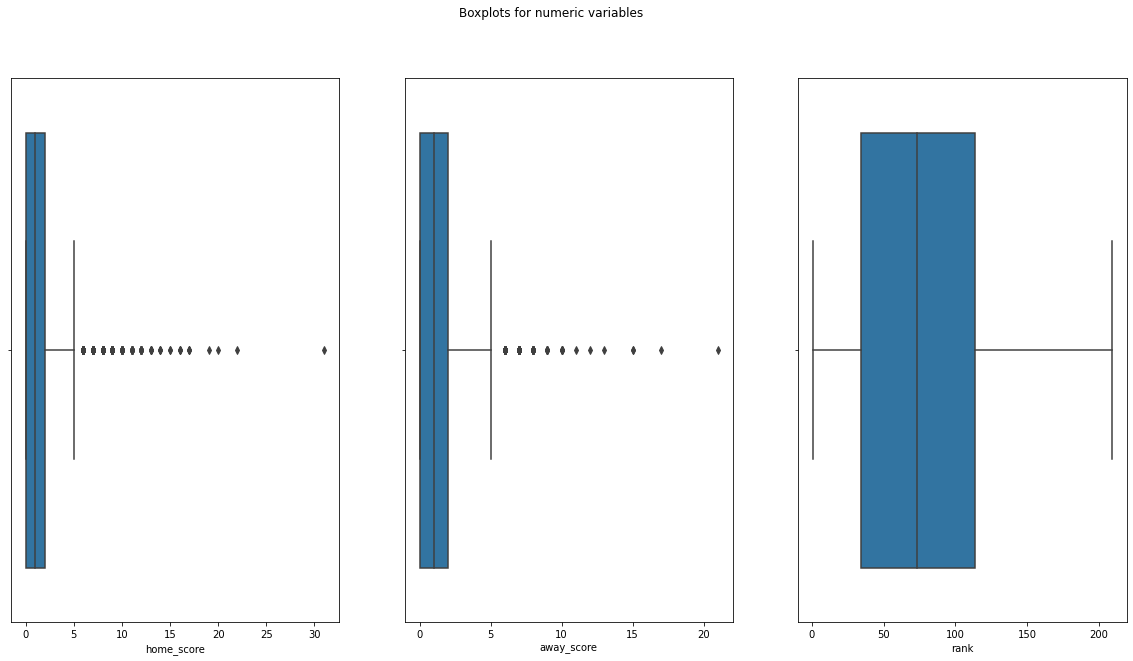

In [22]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(merged['home_score'], ax=ax1)
sns.boxplot(merged['away_score'], ax=ax2)
sns.boxplot(merged['rank'], ax=ax3)

plt.show()

A sampling of the home_score outliers shows that the recorded scores actually happened and no need to drop them. The highest score of 31 goals can be confirmed from the attached link [link](https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa)

The outliers in the away_score can also be confirmed from the following [link](https://https://www.nowuc.com.au/2018/03/the-five-biggest-ever-wins-in-international-soccer/#:~:text=North%20Korea%20vs%20Guam%2021%2D0%2C%2011%20March%202005&text=North%20Korea%20had%20four%20players,winless%20in%20their%20four%20games.)


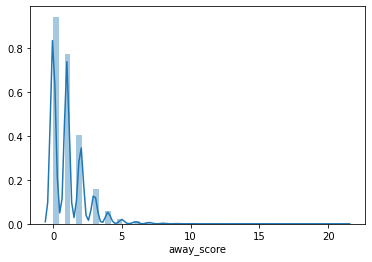

In [23]:
sns.distplot(merged['away_score']) 

Most of the score for the marches are less than 3 goals to the away team

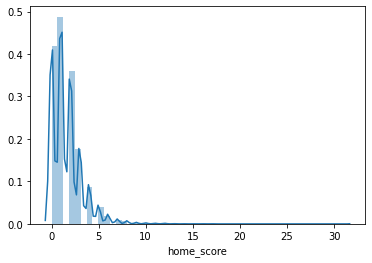

In [24]:
sns.distplot(merged['home_score']) 

Most of the score for the marches are less than 3 goals to the home team

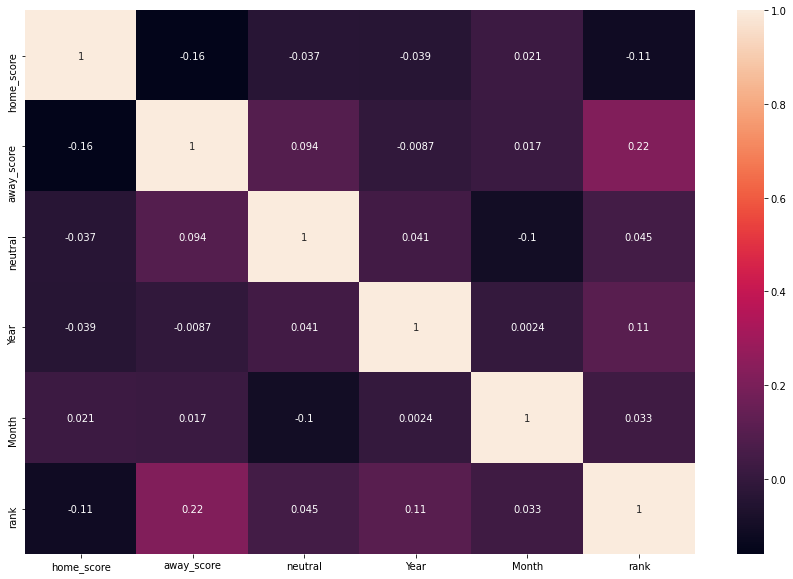

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(merged.corr(), annot=True, ax=ax);

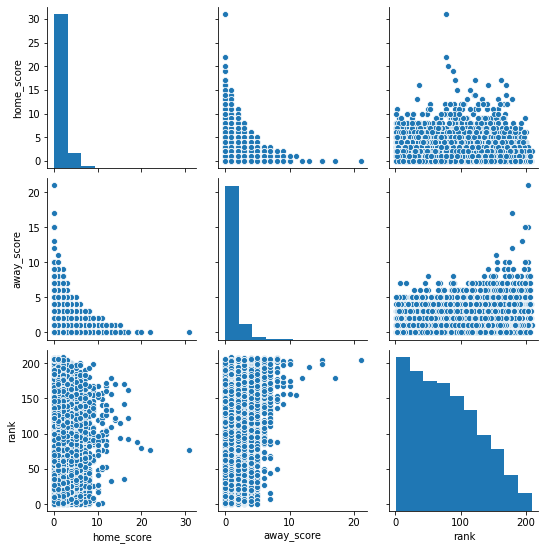

In [26]:
df = pd.DataFrame(merged, columns= ['home_score','away_score','rank'])

sns.pairplot(df) 
plt.show()


Feature Engineerinf to Create a new column for **Status**

To be able to perfom logistic regression on the dataset, a new column needs to be created showing the status of each match from the perspective of the home team, this will indicate whether they won, lost or the match ended in a draw. To create the new column a difference between the home score and away score is used to determine the goal difference of the match

In [27]:
merged['goal_difference'] = merged.home_score - merged.away_score

In [28]:
merged.head(5)

,home_team,away_team,home_score,away_score,tournament,neutral,Year,Month,rank,country_full,goal_difference
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,1
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993,8,19,Colombia,4
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,70,Peru,-1
4,Peru,Colombia,0,1,FIFA World Cup qualification,False,1993,8,70,Peru,-1


In [29]:
conditions = [
    (merged['goal_difference'] < 0),
    (merged['goal_difference'] == 0),
    (merged['goal_difference'] > 0)
    ]

values = ['loss', 'draw', 'win']

merged['Status'] = np.select(conditions, values)

In [30]:
merged.head(5)

,home_team,away_team,home_score,away_score,tournament,neutral,Year,Month,rank,country_full,goal_difference,Status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,0,draw
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,1,win
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993,8,19,Colombia,4,win
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,70,Peru,-1,loss
4,Peru,Colombia,0,1,FIFA World Cup qualification,False,1993,8,70,Peru,-1,loss


## 4. Polynomial Regression

In [74]:
# Using VIF to check for mult

correlations = merged.corr()

correlations

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,neutral,Year,Month,rank,goal_difference
home_score,-6.196951e+12,4.709423e+12,0.069299,0.009437,-0.004209,0.084728,8.363392e+12
away_score,4.709423e+12,-3.578964e+12,-0.131088,0.059529,-0.039567,-0.220181,-6.355827e+12
neutral,6.918286e-02,-1.310001e-01,1.022940,-0.040299,0.107258,-0.023982,-7.134657e-02
Year,9.498169e-03,5.948231e-02,-0.040299,1.014952,-0.004274,-0.110365,3.134274e-02
Month,-4.229752e-03,-3.955125e-02,0.107258,-0.004274,1.013168,-0.035975,-2.836940e-02
rank,8.448003e-02,-2.199924e-01,-0.023982,-0.110365,-0.035975,1.069671,-6.031980e-03
goal_difference,8.363392e+12,-6.355827e+12,-0.071503,0.031425,-0.028398,-0.006367,-1.128722e+13


In [31]:
X = merged['rank'].values.reshape(-1, 1)
y = merged['home_score'].values
print(X)
print(y)

[[19]
 [19]
 [19]
 ...
 [36]
 [27]
 [55]]
[0 2 4 ... 0 0 1]


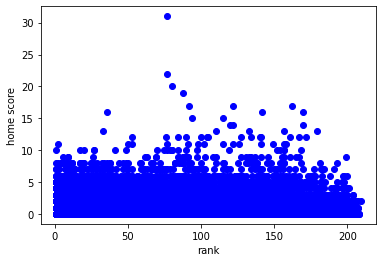

In [32]:
plt.scatter(X, y, color='blue') 
plt.xlabel('rank')
plt.ylabel('home score')
plt.show()

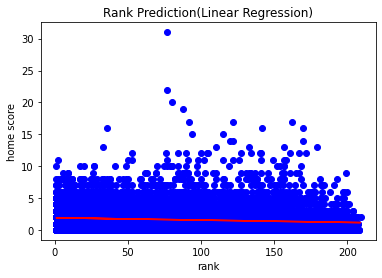

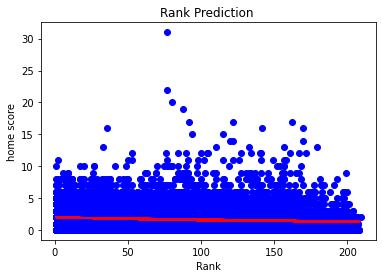

In [33]:
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

reg_line = LinearRegression()
reg_line.fit(X,y)

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Rank Prediction(Linear Regression)')
plt.xlabel('rank')
plt.ylabel('home score')
plt.show()

poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Rank Prediction ')
plt.xlabel('Rank')
plt.ylabel('home score')
plt.show()

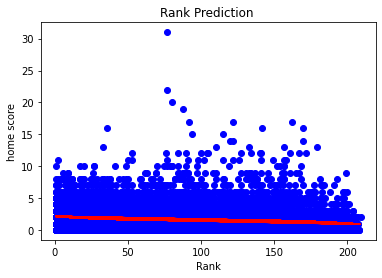

In [34]:
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Rank Prediction ')
plt.xlabel('Rank')
plt.ylabel('home score')
plt.show()

In [38]:
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))


Polynomial prediction: 2


## 5.Logistic Regression Approach

In [75]:
match_status = pd.get_dummies(merged['Status'],drop_first=True)
match_status.head()

,loss,win
0,0,0
1,0,1
2,0,1
3,1,0
4,1,0


In [83]:
X = match_status.drop("win",axis=1)
y = match_status["loss"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [84]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred = LogReg.predict(X_test)

In [99]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[4001,    0],
       [   0, 1582]])

##6. Conclusion

The big amount of data being left out due to incomleteness of some data in one of the datasets might result in the model not being effective as it does not take into account all the possible historical occurances that might affect the results of the international matches.